In [1]:
!pip install pandas


In [2]:
import pandas as pd


# Loading Data


In [3]:
training_data = pd.read_csv(r'C:\Users\adeen.amir\Desktop\nlp\train.csv')


In [4]:
training_data.head()

,dataset,encounter_id,dialogue,note
0,virtassist,D2N001,"[doctor] hi , martha . how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nAnnual exam.\r\n\r\nHIS...
1,virtassist,D2N002,"[doctor] hi , andrew , how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nJoint pain.\r\n\r\nHIST...
2,virtassist,D2N003,"[doctor] hi , john . how are you ?\r\n[patient...",CHIEF COMPLAINT\r\n\r\nBack pain.\r\n\r\nHISTO...
3,virtassist,D2N004,"[doctor] hi , james , how are you ?\r\n[patien...",CHIEF COMPLAINT\r\n\r\nBack pain.\r\n\r\nHISTO...
4,virtassist,D2N005,"[doctor] hey , ms. hill . nice to see you .\r\...",CC:\r\n\r\nRight middle finger pain.\r\n\r\nHP...


In [5]:
training_data.shape

(67, 4)

In [6]:
training_data.describe()


,dataset,encounter_id,dialogue,note
count,67,67,67,67
unique,3,67,67,67
top,aci,D2N001,"[doctor] hi , martha . how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nAnnual exam.\r\n\r\nHIS...
freq,35,1,1,1


In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dataset       67 non-null     object
 1   encounter_id  67 non-null     object
 2   dialogue      67 non-null     object
 3   note          67 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


In [8]:
training_data.isna().value_counts()

dataset  encounter_id  dialogue  note 
False    False         False     False    67
dtype: int64

# Dropping Columns

In [9]:
training_data.drop(['dataset','encounter_id'],axis=1,inplace=True)
training_data.head()

,dialogue,note
0,"[doctor] hi , martha . how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nAnnual exam.\r\n\r\nHIS...
1,"[doctor] hi , andrew , how are you ?\r\n[patie...",CHIEF COMPLAINT\r\n\r\nJoint pain.\r\n\r\nHIST...
2,"[doctor] hi , john . how are you ?\r\n[patient...",CHIEF COMPLAINT\r\n\r\nBack pain.\r\n\r\nHISTO...
3,"[doctor] hi , james , how are you ?\r\n[patien...",CHIEF COMPLAINT\r\n\r\nBack pain.\r\n\r\nHISTO...
4,"[doctor] hey , ms. hill . nice to see you .\r\...",CC:\r\n\r\nRight middle finger pain.\r\n\r\nHP...


# Converting to lower case

In [10]:
training_data['dialogue'] = training_data['dialogue'].apply(lambda x: x.lower())


# Expand contractions


In [11]:
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he ha",
    "he'll": "he shall",
    "he's": "he has",
    "how'd": "how did",
    "how'll": "how will",
    "how's": "how has",
    "i'd": "i had",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'll": "it shall / it will",
    "it's": "it has / it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "needn't": "need not",
    "oughtn't": "ought not",
    "shan't": "shall not",
    "she'd": "she had / she would",
    "she'll": "she shall / she will",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that has / that is",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'll": "they shall / they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'll": "we shall / we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "where's": "where has / where is",
    "who'd": "who had / who would",
    "who'll": "who shall / who will",
    "who're": "who are",
    "who's": "who has / who is",
    "who've": "who have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you had / you would",
    "you'll": "you shall / you will",
    "you're": "you are",
    "you've": "you have"
}


In [12]:
import re

contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)
# Expanding Contractions in the reviews
training_data['dialogue']=training_data['dialogue'].apply(lambda x:expand_contractions(x))
training_data.iloc[0,0]

"[doctor] hi , martha . how are you ?\r\n[patient] i am doing okay . how are you ?\r\n[doctor] i am doing okay . so , i know the nurse told you about dax . i had like to tell dax a little bit about you , okay ?\r\n[patient] okay .\r\n[doctor] martha is a 50-year-old female with a past medical history significant for congestive heart failure , depression and hypertension who presents for her annual exam . so , martha , it has / it is been a year since i have seen you . how are you doing ?\r\n[patient] i am doing well . i have been traveling a lot recently since things have , have gotten a bit lighter . and i got my , my vaccine , so i feel safer about traveling . i have been doing a lot of hiking . uh , went to washington last weekend to hike in northern cascades, like around the mount baker area .\r\n[doctor] nice . that has / that is great . i am glad to hear that you are staying active , you know . i , i just love this weather . i am so happy the summer is over . i am definitely more

In [13]:
training_data['note']=training_data['note'].apply(lambda x:expand_contractions(x))

# Remove Punctuation

In [14]:
import string
training_data['dialogue'] = training_data['dialogue'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [15]:
training_data.iloc[0,0]

'doctor hi  martha  how are you \r\npatient i am doing okay  how are you \r\ndoctor i am doing okay  so  i know the nurse told you about dax  i had like to tell dax a little bit about you  okay \r\npatient okay \r\ndoctor martha is a 50yearold female with a past medical history significant for congestive heart failure  depression and hypertension who presents for her annual exam  so  martha  it has  it is been a year since i have seen you  how are you doing \r\npatient i am doing well  i have been traveling a lot recently since things have  have gotten a bit lighter  and i got my  my vaccine  so i feel safer about traveling  i have been doing a lot of hiking  uh  went to washington last weekend to hike in northern cascades like around the mount baker area \r\ndoctor nice  that has  that is great  i am glad to hear that you are staying active  you know  i  i just love this weather  i am so happy the summer is over  i am definitely more of a fall person \r\npatient yes  fall foliage is t

In [16]:
training_data['dialogue'] = training_data['dialogue'].apply(lambda x: x.replace('\r\n', ''))

In [17]:
training_data['note'] = training_data['note'].apply(lambda x: x.replace('\r\n', ''))

# Remove extra spaces

In [18]:
training_data['dialogue'] = training_data['dialogue'].apply(lambda x: re.sub(' +', ' ', x))

In [19]:
training_data.iloc[0,0]

'doctor hi martha how are you patient i am doing okay how are you doctor i am doing okay so i know the nurse told you about dax i had like to tell dax a little bit about you okay patient okay doctor martha is a 50yearold female with a past medical history significant for congestive heart failure depression and hypertension who presents for her annual exam so martha it has it is been a year since i have seen you how are you doing patient i am doing well i have been traveling a lot recently since things have have gotten a bit lighter and i got my my vaccine so i feel safer about traveling i have been doing a lot of hiking uh went to washington last weekend to hike in northern cascades like around the mount baker area doctor nice that has that is great i am glad to hear that you are staying active you know i i just love this weather i am so happy the summer is over i am definitely more of a fall person patient yes fall foliage is the best doctor yeah um so tell me how are you doing with t


# Stop words removal


In [20]:
stop_words = ['i', 'um','me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


In [21]:
def remove_StopWord(x):
    word_tokens=x.split()
    filtered_sentence = ''
 
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence=filtered_sentence+w+' '
    x=filtered_sentence
    return x


    

In [22]:
training_data['dialogue'] = training_data['dialogue'].apply(lambda x: remove_StopWord(x))

In [23]:
training_data.iloc[0,0]

'doctor hi martha patient okay doctor okay know nurse told dax like tell dax little bit okay patient okay doctor martha 50yearold female past medical history significant congestive heart failure depression hypertension presents annual exam martha year since seen patient well traveling lot recently since things gotten bit lighter got vaccine feel safer traveling lot hiking uh went washington last weekend hike northern cascades like around mount baker area doctor nice great glad hear staying active know love weather happy summer definitely fall person patient yes fall foliage best doctor yeah tell congestive heart failure watching diet know talked watching low sodium diet okay patient well resisted much could tater tots know soft pretzels salty foods love eat really good job doctor okay right well glad hear taking medication patient yes doctor okay good symptoms like chest pains shortness breath swelling legs patient noticed doctor okay right terms depression know tried stay medication p

# Counting words

In [24]:
word_dict=dict()
def count_Each_word(x):
    word_tokens=x.split()
    for word in word_tokens:
        word_dict[word]=word_dict.get(word,0)+1
    return x

    

In [25]:
training_data['dialogue'].apply(lambda x: count_Each_word(x))
training_data.iloc[0,0]

'doctor hi martha patient okay doctor okay know nurse told dax like tell dax little bit okay patient okay doctor martha 50yearold female past medical history significant congestive heart failure depression hypertension presents annual exam martha year since seen patient well traveling lot recently since things gotten bit lighter got vaccine feel safer traveling lot hiking uh went washington last weekend hike northern cascades like around mount baker area doctor nice great glad hear staying active know love weather happy summer definitely fall person patient yes fall foliage best doctor yeah tell congestive heart failure watching diet know talked watching low sodium diet okay patient well resisted much could tater tots know soft pretzels salty foods love eat really good job doctor okay right well glad hear taking medication patient yes doctor okay good symptoms like chest pains shortness breath swelling legs patient noticed doctor okay right terms depression know tried stay medication p

In [26]:
word_dict

{'doctor': 1146,
 'hi': 39,
 'martha': 3,
 'patient': 1002,
 'okay': 1295,
 'know': 600,
 'nurse': 39,
 'told': 25,
 'dax': 23,
 'like': 542,
 'tell': 78,
 'little': 281,
 'bit': 205,
 '50yearold': 2,
 'female': 13,
 'past': 62,
 'medical': 35,
 'history': 66,
 'significant': 22,
 'congestive': 15,
 'heart': 128,
 'failure': 23,
 'depression': 19,
 'hypertension': 19,
 'presents': 13,
 'annual': 5,
 'exam': 193,
 'year': 43,
 'since': 82,
 'seen': 19,
 'well': 284,
 'traveling': 5,
 'lot': 111,
 'recently': 11,
 'things': 59,
 'gotten': 7,
 'lighter': 3,
 'got': 88,
 'vaccine': 9,
 'feel': 114,
 'safer': 1,
 'hiking': 2,
 'uh': 287,
 'went': 30,
 'washington': 1,
 'last': 95,
 'weekend': 10,
 'hike': 1,
 'northern': 1,
 'cascades': 1,
 'around': 57,
 'mount': 1,
 'baker': 1,
 'area': 16,
 'nice': 40,
 'great': 110,
 'glad': 15,
 'hear': 40,
 'staying': 2,
 'active': 16,
 'love': 18,
 'weather': 4,
 'happy': 16,
 'summer': 8,
 'definitely': 30,
 'fall': 14,
 'person': 3,
 'yes': 115,
 '

# Visualising the frequency of each word

In [27]:
!pip install matplotlib

In [28]:
import matplotlib.pyplot as plt


In [29]:
sorted_word_dict = dict(sorted(word_dict.items(), key=lambda x:x[1],reverse=True)) #first param passes tuples, second the values
print(sorted_word_dict)

{'okay': 1295, 'doctor': 1146, 'patient': 1002, 'know': 600, 'like': 542, 'right': 501, 'nt': 449, 'good': 406, 'yeah': 399, 'na': 376, 'pain': 306, 'uh': 287, 'well': 284, 'little': 281, 'go': 280, 'gon': 274, 'think': 267, 'get': 266, 'see': 259, 'let': 243, 'really': 223, 'back': 209, 'bit': 205, 'exam': 193, 'one': 177, 'take': 174, 'alright': 173, 'blood': 170, 'us': 169, 'going': 164, 'ahead': 164, 'shall': 156, 'would': 146, 'hey': 135, 'time': 135, 'anything': 133, 'want': 132, 'day': 129, 'heart': 128, 'also': 128, 'two': 126, 'look': 125, 'help': 116, 'yes': 115, 'feel': 114, 'need': 112, 'lot': 111, 'great': 110, 'knee': 107, 'dragon': 106, 'wan': 102, 'physical': 97, 'last': 95, 'sounds': 95, 'today': 90, 'got': 88, 'first': 88, 'milligrams': 88, 'taking': 86, 'foot': 86, 'looks': 83, 'since': 82, 'pressure': 79, 'continue': 79, 'sure': 79, 'tell': 78, 'show': 78, 'order': 78, 'able': 78, 'still': 77, 'mean': 77, 'talk': 76, 'okaypatient': 76, 'pretty': 75, 'mmhmm': 73, 'ma

In [30]:
list(sorted_word_dict.keys())[:50]

['okay',
 'doctor',
 'patient',
 'know',
 'like',
 'right',
 'nt',
 'good',
 'yeah',
 'na',
 'pain',
 'uh',
 'well',
 'little',
 'go',
 'gon',
 'think',
 'get',
 'see',
 'let',
 'really',
 'back',
 'bit',
 'exam',
 'one',
 'take',
 'alright',
 'blood',
 'us',
 'going',
 'ahead',
 'shall',
 'would',
 'hey',
 'time',
 'anything',
 'want',
 'day',
 'heart',
 'also',
 'two',
 'look',
 'help',
 'yes',
 'feel',
 'need',
 'lot',
 'great',
 'knee',
 'dragon']

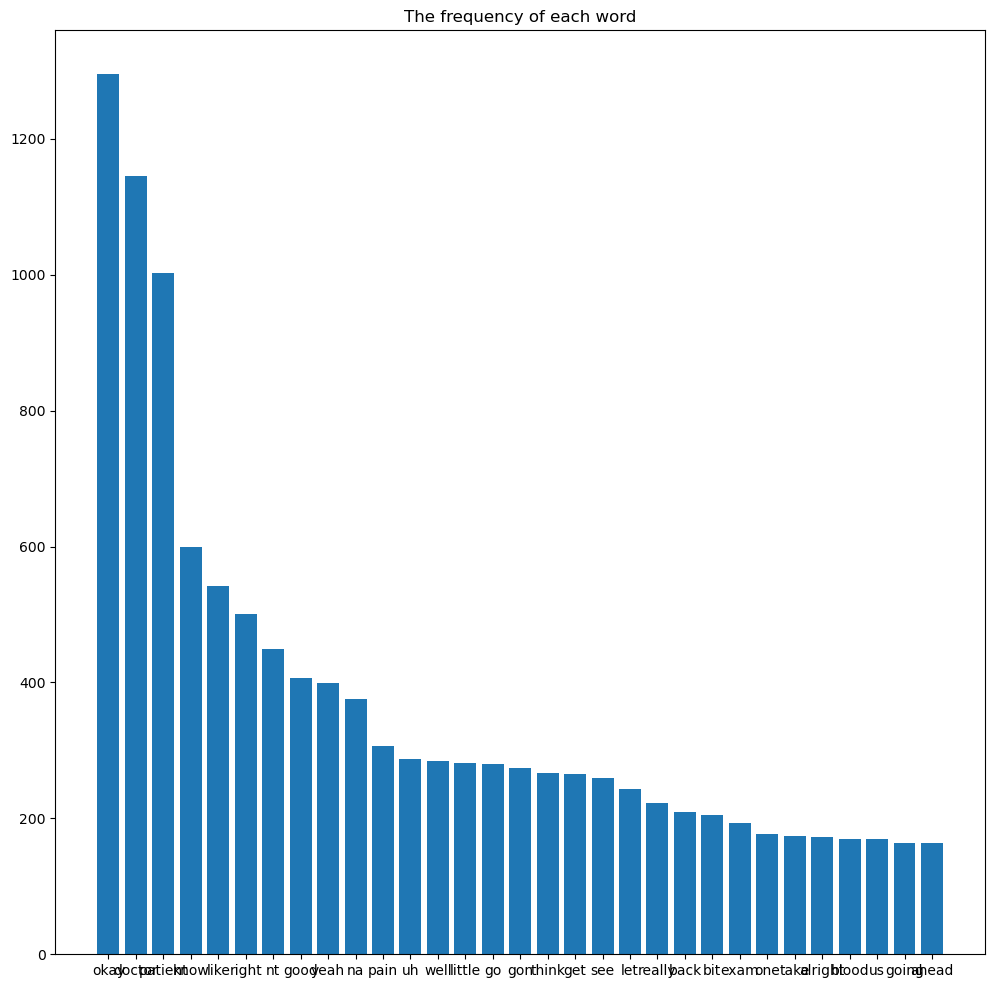

In [31]:
%matplotlib inline
fig,ax=plt.subplots(figsize=(12,12))
ax.bar(list(sorted_word_dict.keys())[:31],list(sorted_word_dict.values())[:31])
plt.title("The frequency of each word")
plt.show()

# Making a wordcloud

In [32]:
dialogue2 = ''

def make_string(x):
    global dialogue2
    dialogue2 += x
    dialogue2 += ' '

training_data['dialogue'].apply(lambda x: make_string(x))
print(dialogue2)

doctor hi martha patient okay doctor okay know nurse told dax like tell dax little bit okay patient okay doctor martha 50yearold female past medical history significant congestive heart failure depression hypertension presents annual exam martha year since seen patient well traveling lot recently since things gotten bit lighter got vaccine feel safer traveling lot hiking uh went washington last weekend hike northern cascades like around mount baker area doctor nice great glad hear staying active know love weather happy summer definitely fall person patient yes fall foliage best doctor yeah tell congestive heart failure watching diet know talked watching low sodium diet okay patient well resisted much could tater tots know soft pretzels salty foods love eat really good job doctor okay right well glad hear taking medication patient yes doctor okay good symptoms like chest pains shortness breath swelling legs patient noticed doctor okay right terms depression know tried stay medication pa

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


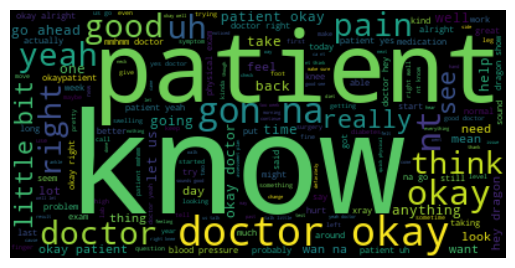

In [34]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(dialogue2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Remove some words

In [35]:
def remove_words(input_string, words_to_remove):
    words = input_string.split()  # Split the string into a list of words
    filtered_words = [word for word in words if word.lower() not in words_to_remove]
    return ' '.join(filtered_words)  # Join the filtered words back into a string


words_to_remove = ['okay',
 'doctor',
 'patient',
 'know',
 'like',
 'right',
 'nt',
 'good',
 'yeah',
 'na',
 'pain',
 'uh',
 'well',
 'little',
 'go',
 'gon',
 'think',
 'get',
 'see',
 'let',
 'really',
 'back',
 'bit',
 'one',
 'take','us',
 'going',
 'ahead',
 'shall',
 'would',
 'hey',
 'time',
 'anything',
 'alright',
 'want',
 'day','also',
 'two',
 'look',
 'yes',
 'feel',
 'need',
 'lot',
 'great','dragon']
result = remove_words(dialogue2, words_to_remove)
print(result)

hi martha nurse told dax tell dax martha 50yearold female past medical history significant congestive heart failure depression hypertension presents annual exam martha year since seen traveling recently since things gotten lighter got vaccine safer traveling hiking went washington last weekend hike northern cascades around mount baker area nice glad hear staying active love weather happy summer definitely fall person fall foliage best tell congestive heart failure watching diet talked watching low sodium diet resisted much could tater tots soft pretzels salty foods love eat job glad hear taking medication symptoms chest pains shortness breath swelling legs noticed terms depression tried stay medication past medications problems enrolled therapy helping orpatient helping every week past year since last annual exam helpful issues feelings wanting harm hurt others nothing terms high blood pressure kind battled past remembering blood pressure medications still forgetting blood pressure med

# Regenerate wordcloud


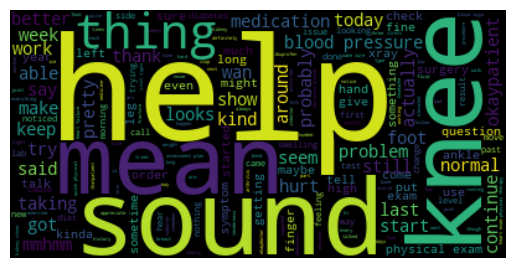

In [36]:
from wordcloud import WordCloud
wc = WordCloud()
wc.generate(result)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# spaCy NER tagger

In [37]:
!pip install spacy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.



  Obtaining dependency information for typing-extensions>=4.6.1 from https://files.pythonhosted.org/packages/ec/6b/63cc3df74987c36fe26157ee12e09e8f9db4de771e0f3404263117e75b95/typing_extensions-4.7.1-py3-none-any.whl.metadata
  Using cached typing_extensions-4.7.1-py3-none-any.whl.metadata (3.1 kB)
Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


In [38]:
import spacy
from spacy import displacy


ImportError: cannot import name 'TypeAliasType' from 'typing_extensions' (C:\Users\adeen.amir\AppData\Local\anaconda3\Lib\site-packages\typing_extensions.py)

In [ ]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [ ]:
NER = spacy.load("en_core_web_sm")

def spacy_large_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in NER(document).ents}

In [ ]:
spacy_large_ner(result)

# stanford ner

In [ ]:
!pip3 install nltk==3.2.4
!wget http://nlp.stanford.edu/software/stanford-ner-2015-04-20.zip
!unzip stanford-ner-2015-04-20.zip

# LED

In [ ]:
!pip install transformers
!pip install rouge_score

In [ ]:
!pip install tensorflow

In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("allenai/led-base-16384")